<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Bayesian Statistics With Baseball Data: Priors and Posteriors

_Authors: Kiefer Katovich (SF)_

---

Let’s review the general set up for Bayesian modeling. We have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

This is the diachronic interpretation of Bayes' theorem.

It can also be written as:

### $$posterior \propto likelihood \cdot prior$$

Here, the posterior is an update of our prior belief given the data observed.

---

### 1) Write functions to calculate the binomial likelihood and log likelihood.

The binomial likelihood is defined as:

### $$likelihood(n,k\;|\;p) = \binom{n}{k}p^k(1-p)^{n-k}$$

Because the binomial likelihood can break easily with high counts, the log likelihood is often used in its place:

### $$log(likelihood) = log\binom{n}{k}+k \cdot log(p)+(n-k) \cdot log(1-p)$$

**Your functions should:**

1) Take the probability, $p$, the number of trials, $n$, and the number of successes, $k$.  
2) Return a likelihood for the trials and successes at that probability.

> **Hint:** Recall that `np.log()` can be used for natural log. `np.exp()` is useful for getting your likelihood out when the log likelihood function is done computing. `scipy.misc.comb()` can get the combinations.

In [ ]:
# A:

### 2) Calculate likelihoods using both functions for the values below. 

    n=10, k=3
    n=10, k=7
    n=20, k=15
    n=50, k=9
    n=70, k=50
    n=100, k=96
    
**For probabilities:**

    p = [0.05, 0.5, 0.95]

In [ ]:
# A:

## Review: The Beta Distribution

---

[The beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is the appropriate prior distribution for modeling Bernoulli and/or binomial processes (occurrences of successes or failures, etc.). It is a model of the random behavior of data related to percentages, rates, proportions, etc.

The beta distribution takes two parameters: $Beta(\alpha,\beta)$.

The $\alpha$, or **alpha**, parameter can be thought of as the number of `successes + 1`.

The $\beta$, or **beta**, parameter can be thought of as the number of `failures + 1`.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" alt="betapdf" style="width: 400px;"/>

### 3) Plot the beta probability density functions.

Use the `scipy.stats.beta` object to calculate the probability density of the beta function across a range of points.

Create one plot for each of the $n, k$ pairs you calculated the likelihood for above (converting them into success, failure pairs for the alpha, beta parameters). Plot the probability density function values across a range of probabilities between zero and one.

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.beta.html

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.stats import beta

In [ ]:
# A:

## Review: The Beta as a Conjugate Prior

---

The beta distribution is a **conjugate prior** for the binomial (and beta) distributions. What does this mean?

Take the calculation of the posterior distribution with a binomial likelihood function (any binary outcome data):

### $$\text{beta posterior} = \text{binomial likelihood} \cdot \text{beta prior}$$

**Because the beta distribution is a conjugate prior of the binomial likelihood, it guarantees that the posterior distribution will also be a beta distribution.**

> **Note:** Conjugate priors are extremely useful for calculating posteriors directly. Unfortunately, we don’t have the convenience of a conjugate prior in many modeling scenarios. This is where methods such as Markov chain Monte Carlo (MCMC) will come into play.

## Bayesian Analysis of Batting Averages

---

Load in the simple batting average data for players below. There are just four fields in the data set: the player's name, their times at bat, their hits, and their batting average.

> *Note: [This section of the lab is a partial replication of this exercise in R, if you're interested](https://www.r-bloggers.com/understanding-empirical-bayes-estimation-using-baseball-statistics/). Here, we took out the empirical Bayes section because it's not technically a correct interpretation of Bayesian statistical analysis.*

In [ ]:
# A:

### 4) Find the top and bottom three hitters according to their average.

What is wrong with using the average to find the three best and worst hitters?

In [ ]:
# A:

### 5) Set up a prior distribution to represent our belief about batting average.

[After doing a quick search online](https://www.google.com/search?q=average+batting+average+for+players+mlb&oq=average+batting+average+for+players+mlb&aqs=chrome..69i57j0.7373j0j4&sourceid=chrome&ie=UTF-8), it looks like the overall batting average for MLB baseball players is around 0.260.

**Let's make it simple and say that our prior belief is that, out of 100 at-bats, we’ve seen 26 hits. Set up a beta distribution with `alpha=27` and `beta=75`. Plot it with the function from above.**

This is our distribution of beliefs on the batting average (probability of hitting while at bat) for MLB players.

In [ ]:
# A:

### 6) Calculate the maximum a posteriori (MAP) estimate of players' batting averages.

The maximum a posteriori (MAP) estimate is the mode of a posterior distribution for a statistical parameter.

In our case, the MAP estimate for our players' batting averages will be the mode of the posterior beta distribution we get from updating our prior distribution with their at bats and hits.

---

> *Note: For an additional overview of the math behind updating the beta distribution posterior and conjugate priors, ([check out this website](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)).*

We need to update our beta distribution’s prior belief about batting averages with a player's at-bat and hit information to get a _new_ beta posterior distribution for that player's batting average. 

Luckily, with the beta distribution, the update is just a matter of adding in our new observations to the alpha and beta parameters, where alpha is the number of hits and beta is the number of misses/strikes:

    observed_hits = n_hits
    observed_misses = n_misses
    beta_prior = Beta(prior_hits+1, prior_misses+1)
    beta_posterior = Beta(prior_hits + n_nits + 1, prior_misses + n_misses + 1)
    
> **Note:** This process will also be useful in the context of A/B testing, which we’ll look at later on.

For each player, update the prior to the posterior distribution and calculate the mode of the distribution. The mode of a beta distribution is conveniently defined as:

### $$ \frac{\alpha - 1}{\alpha + \beta -2} $$

Which means we don't even need to use SciPy's beta distribution function. Just calculate the new alpha (hits) and beta (misses) for each player's posterior beta distribution and plug them into the formula above to get the MAP estimate of batting the average.

In [ ]:
# A:

### 7) Look up the top and bottom batters according to the MAP estimate.

In [ ]:
# A:

### 8) Plot the MLE batting average against the MAP batting average.

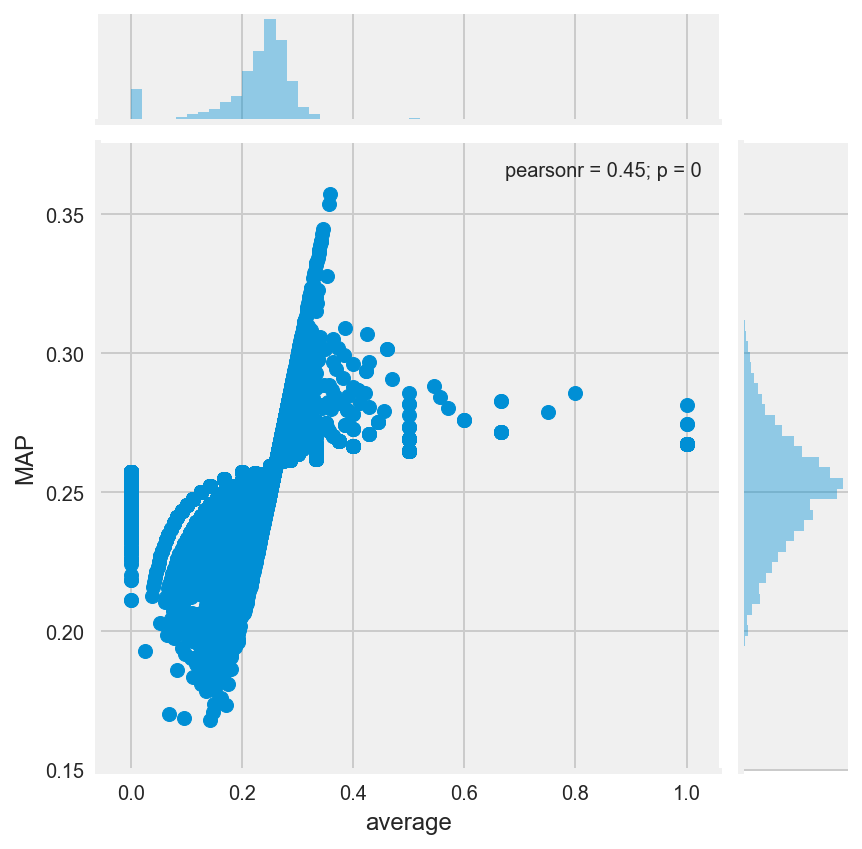

In [17]:
# A: